# Analisis de Exploracion de Datos
Vamos a utilizar pandas, matplotlib y seaborn para la visualizacion de las Series de Tiempo
En nuestro caso usaremos una serie de tiempo que contiene el comportamiento histórico de la acción de Microsoft desde marzo de 1986 hasta la actualidad

In [36]:
# Instalar la libreria Yahoo Finance(sitio que almacena el comportamiento en tiempo de diferentes acciones en la bolsa)
%pip install yfinance
%pip install matplotlib seaborn missingno scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
# PASO 1: IMPORTACION DE LIBRERIAS Y MODULOS

import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Configuracion de estilos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [38]:
# ============================================================================
# CREAR DIRECTORIOS SI NO EXISTEN
# ============================================================================
datos_path = r'C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed'
docs_path = r'C:\Users\alexi\AnalisisDeSeriesTemporales\docs'
images_path = r'C:\Users\alexi\AnalisisDeSeriesTemporales\images'

# Crear directorios si no existen
os.makedirs(datos_path, exist_ok=True)
os.makedirs(docs_path, exist_ok=True)
os.makedirs(images_path, exist_ok=True)

print(f"✓ Ruta de datos: {datos_path}")
print(f'✓ Ruta de imagenes: {images_path}')
print(f"✓ Ruta de docs: {docs_path}\n")

✓ Ruta de datos: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed
✓ Ruta de imagenes: C:\Users\alexi\AnalisisDeSeriesTemporales\images
✓ Ruta de docs: C:\Users\alexi\AnalisisDeSeriesTemporales\docs



In [39]:

## -- DESCARGA DE DATOS CON PARÁMETROS CORRECTOS
## Explicación :
## - ticker = "MSFT" Codigo de cotización de Microsoft
## - start = "1999-10-01" : Fecha inicial (desde 1986)
## - end   = "2025-10-16" : Fecha final()
## - auto_adjust= False: CRITICO - Mantiene la columna 'Adj Close'
## - progress= False: Suprime mensajes de progreso para limpieza

In [40]:
# ============================================================================
# TAREA 1: DESCARGA Y EXPLORACIÓN DEL DATASET
# ============================================================================

print("="*80)
print("INICIANDO DESCARGA DE DATOS DE MICROSOFT (MSFT)")
print("="*80)

df = yf.download(
    tickers="MSFT",
    start="1999-10-02",
    end="2025-10-16",
    auto_adjust=False,
    progress=False
)

print(f"✓ Datos descargados exitosamente\n")

# Limpieza de nombres de columnas
df.columns = ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df = df[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]

print("✓ Nombres de columnas normalizados\n")

print("ESTRUCTURA GENERAL DEL DATASET:")
print("-" * 80)
print(f"Forma del dataset: {df.shape[0]} registros × {df.shape[1]} columnas")
print(f"Rango temporal: {df.index.min().date()} a {df.index.max().date()}")
print(f"Número de años: {(df.index.max() - df.index.min()).days / 365.25:.1f} años\n")

print("Información de tipos de datos:")
print(df.info())
print()

print("Primeras 3 registros:")
print(df.head(3))
print("\nÚltimas 3 registros:")
print(df.tail(3))
print()

INICIANDO DESCARGA DE DATOS DE MICROSOFT (MSFT)
✓ Datos descargados exitosamente

✓ Nombres de columnas normalizados

ESTRUCTURA GENERAL DEL DATASET:
--------------------------------------------------------------------------------
Forma del dataset: 6549 registros × 6 columnas
Rango temporal: 1999-10-04 a 2025-10-15
Número de años: 26.0 años

Información de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6549 entries, 1999-10-04 to 2025-10-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6549 non-null   float64
 1   High       6549 non-null   float64
 2   Low        6549 non-null   float64
 3   Close      6549 non-null   float64
 4   Adj_Close  6549 non-null   float64
 5   Volume     6549 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 358.1 KB
None

Primeras 3 registros:
                Open     High       Low     Close  Adj_Close    Volume
Date                         

ANÁLISIS DE CALIDAD DE DATOS

VALORES NULOS POR COLUMNA:
--------------------------------------------------------------------------------
Open            | Nulos:     0 (  0.00%)
High            | Nulos:     0 (  0.00%)
Low             | Nulos:     0 (  0.00%)
Close           | Nulos:     0 (  0.00%)
Adj_Close       | Nulos:     0 (  0.00%)
Volume          | Nulos:     0 (  0.00%)


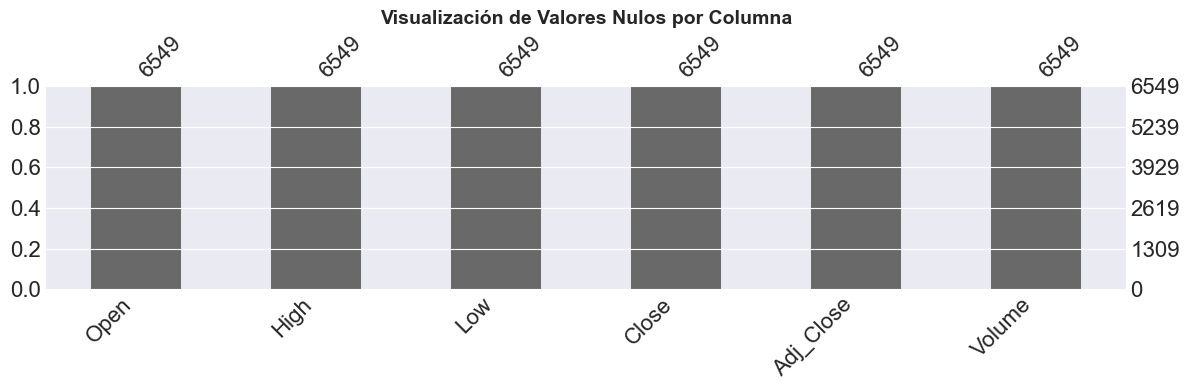


✓ Análisis de valores nulos completado

Registros duplicados encontrados: 0


In [41]:
# ============================================================================
# TAREA 1: PASO 2 - DETECCIÓN DE VALORES NULOS Y DUPLICADOS
# ============================================================================

print("="*80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*80)

valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

print("\nVALORES NULOS POR COLUMNA:")
print("-" * 80)
for col in df.columns:
    print(f"{col:15} | Nulos: {valores_nulos[col]:5} ({porcentaje_nulos[col]:6.2f}%)")

# Visualización de valores nulos usando missingno
fig, ax = plt.subplots(figsize=(12, 4))
msno.bar(df, ax=ax)
plt.title('Visualización de Valores Nulos por Columna', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✓ Análisis de valores nulos completado\n")

# Detección de duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

if duplicados > 0:
    print("Eliminando duplicados...")
    df = df[~df.duplicated()]
    print(f"✓ Dataset después de eliminar duplicados: {df.shape[0]} registros\n")

ANÁLISIS ESTADÍSTICO Y OUTLIERS

ESTADÍSTICAS DESCRIPTIVAS:
--------------------------------------------------------------------------------
            count          mean           std           min           25%  \
Open       6549.0  1.031491e+02  1.247065e+02  1.520000e+01  2.727000e+01   
High       6549.0  1.041573e+02  1.257808e+02  1.562000e+01  2.751000e+01   
Low        6549.0  1.021136e+02  1.235545e+02  1.487000e+01  2.704000e+01   
Close      6549.0  1.031739e+02  1.247259e+02  1.515000e+01  2.728000e+01   
Adj_Close  6549.0  9.553730e+01  1.259601e+02  1.115939e+01  1.905202e+01   
Volume     6549.0  4.923776e+07  3.076700e+07  7.164500e+06  2.645030e+07   

                    50%           75%           max  
Open       3.503000e+01  1.205400e+02  5.552300e+02  
High       3.543750e+01  1.208500e+02  5.554500e+02  
Low        3.462500e+01  1.195400e+02  5.319000e+02  
Close      3.499000e+01  1.202200e+02  5.356400e+02  
Adj_Close  2.587064e+01  1.132351e+02  5.347609e+

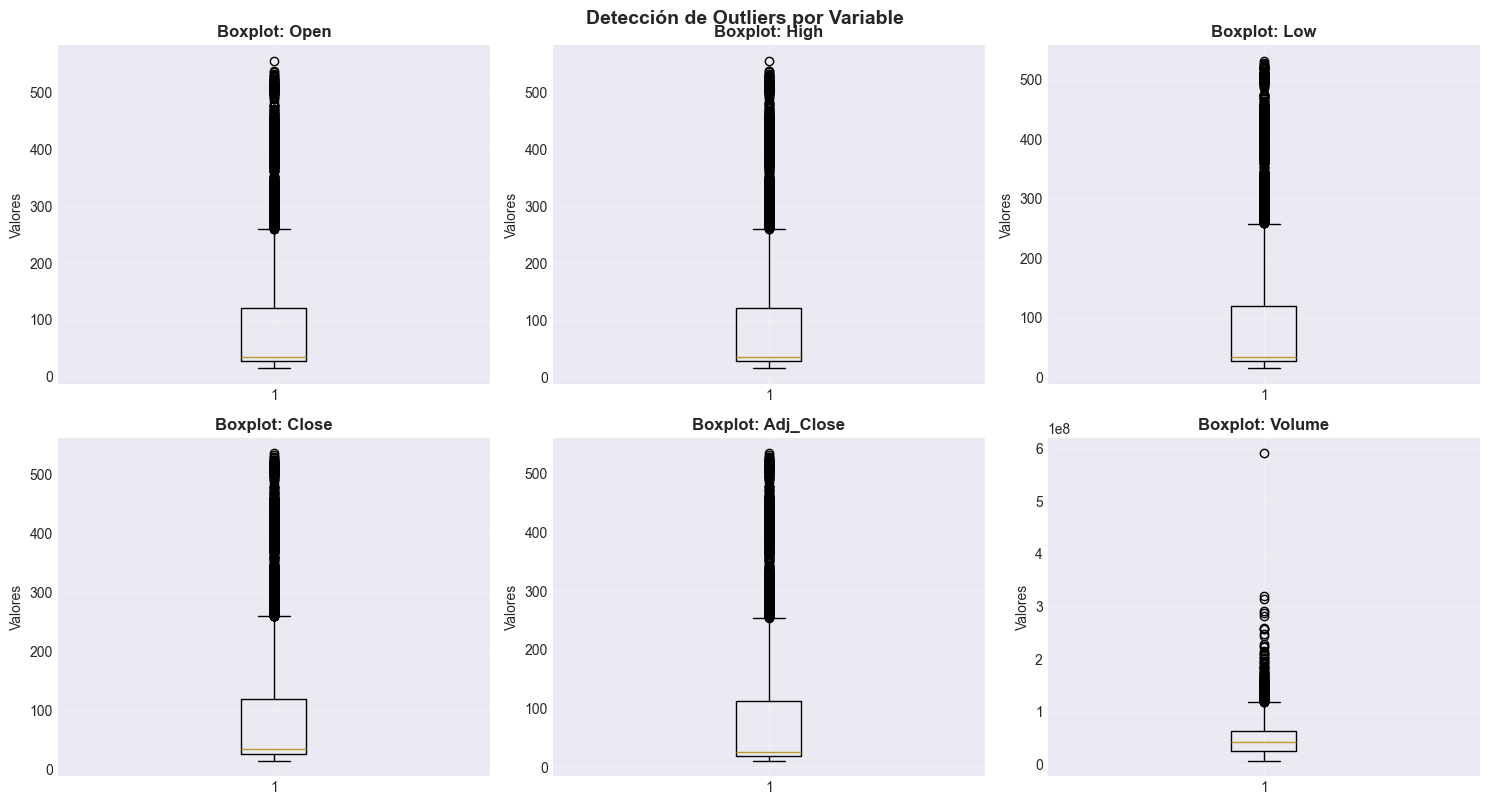

In [42]:
# ============================================================================
# TAREA 1: PASO 3 - ANÁLISIS ESTADÍSTICO Y DETECCIÓN DE OUTLIERS
# ============================================================================

print("="*80)
print("ANÁLISIS ESTADÍSTICO Y OUTLIERS")
print("="*80)

print("\nESTADÍSTICAS DESCRIPTIVAS:")
print("-" * 80)
estadisticas = df.describe().T
print(estadisticas)

print("\n\nDETECCIÓN DE OUTLIERS (Método IQR):")
print("-" * 80)

outliers_por_columna = {}

for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
    outliers_por_columna[col] = outliers
    
    print(f"\n{col}:")
    print(f"  Q1 (25%):        {Q1:>15.2f}")
    print(f"  Q3 (75%):        {Q3:>15.2f}")
    print(f"  IQR:             {IQR:>15.2f}")
    print(f"  Límite inferior: {limite_inf:>15.2f}")
    print(f"  Límite superior: {limite_sup:>15.2f}")
    print(f"  Outliers detectados: {outliers}")

# Visualización de outliers con boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[idx].set_ylabel('Valores')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Detección de Outliers por Variable', fontsize=14, fontweight='bold', y=1.00)
plt.show()


ANÁLISIS DE DISTRIBUCIONES


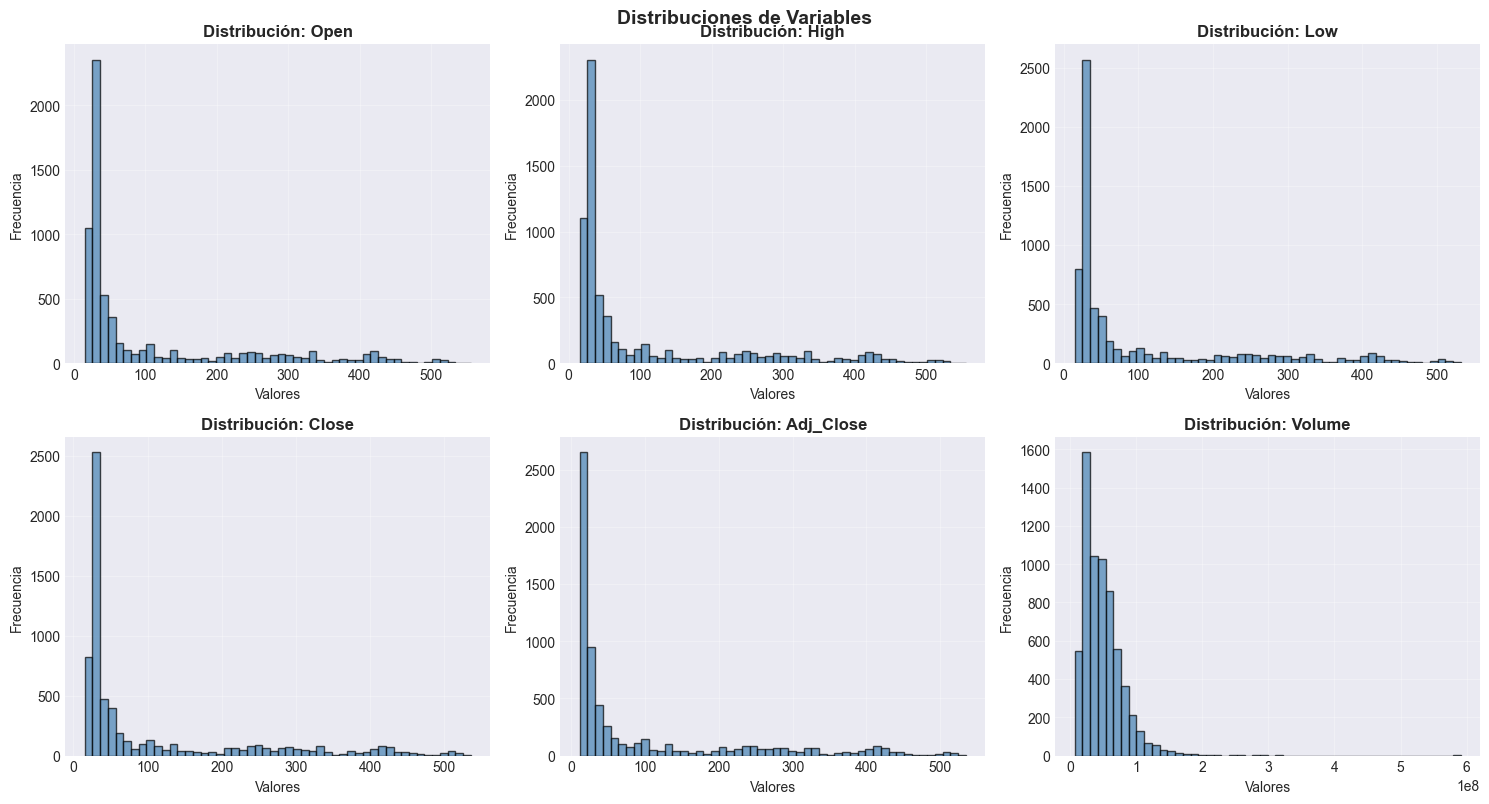


PRUEBA DE NORMALIDAD (Shapiro-Wilk):
--------------------------------------------------------------------------------
Open            | p-value: 0.000000 | ¿Es normal?: NO
High            | p-value: 0.000000 | ¿Es normal?: NO
Low             | p-value: 0.000000 | ¿Es normal?: NO
Close           | p-value: 0.000000 | ¿Es normal?: NO
Adj_Close       | p-value: 0.000000 | ¿Es normal?: NO
Volume          | p-value: 0.000000 | ¿Es normal?: NO


In [43]:
# ============================================================================
# TAREA 1: PASO 4 - ANÁLISIS DE DISTRIBUCIONES
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE DISTRIBUCIONES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    axes[idx].hist(df[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribución: {col}', fontweight='bold')
    axes[idx].set_xlabel('Valores')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribuciones de Variables', fontsize=14, fontweight='bold', y=1.00)
plt.show()

print("\nPRUEBA DE NORMALIDAD (Shapiro-Wilk):")
print("-" * 80)
for col in df.select_dtypes(include=[np.number]).columns:
    stat, p_value = stats.shapiro(df[col].sample(min(5000, len(df))))
    es_normal = "SÍ" if p_value > 0.05 else "NO"
    print(f"{col:15} | p-value: {p_value:.6f} | ¿Es normal?: {es_normal}")



ANÁLISIS ESPECÍFICO DE SERIE DE TIEMPO


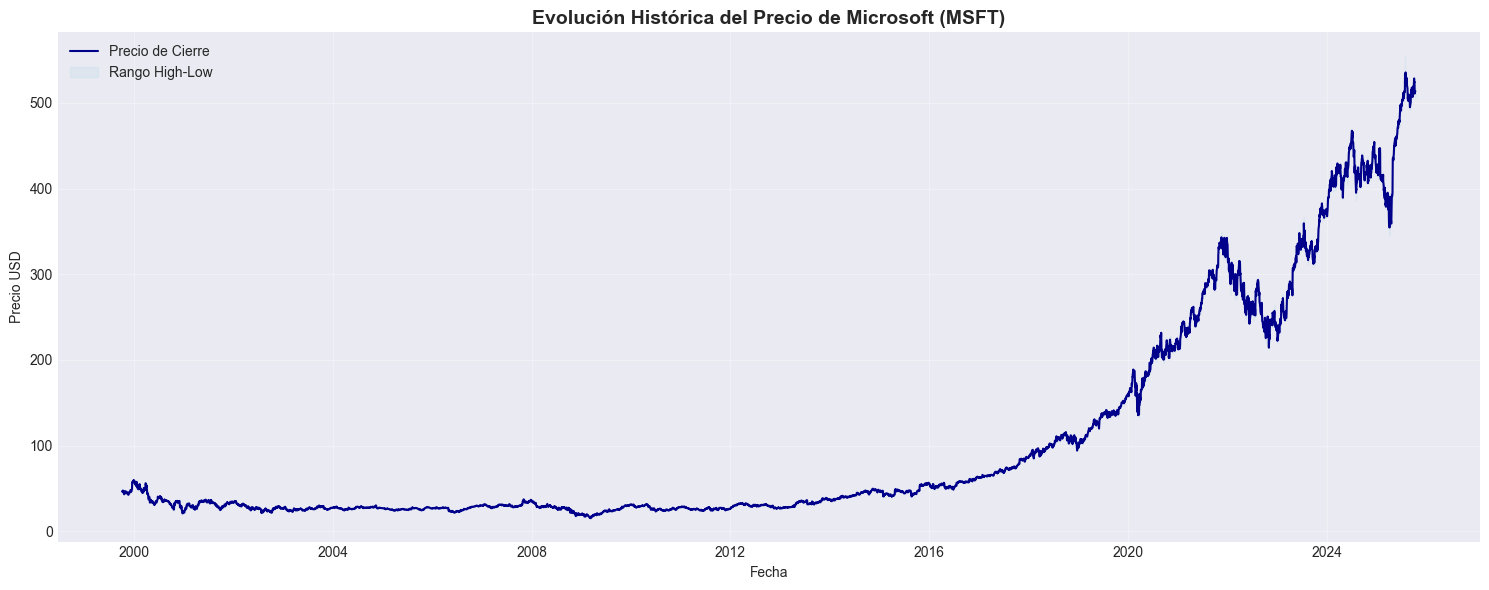


Volatilidad diaria promedio: 1.9020%
Volatilidad anualizada: 30.1928%


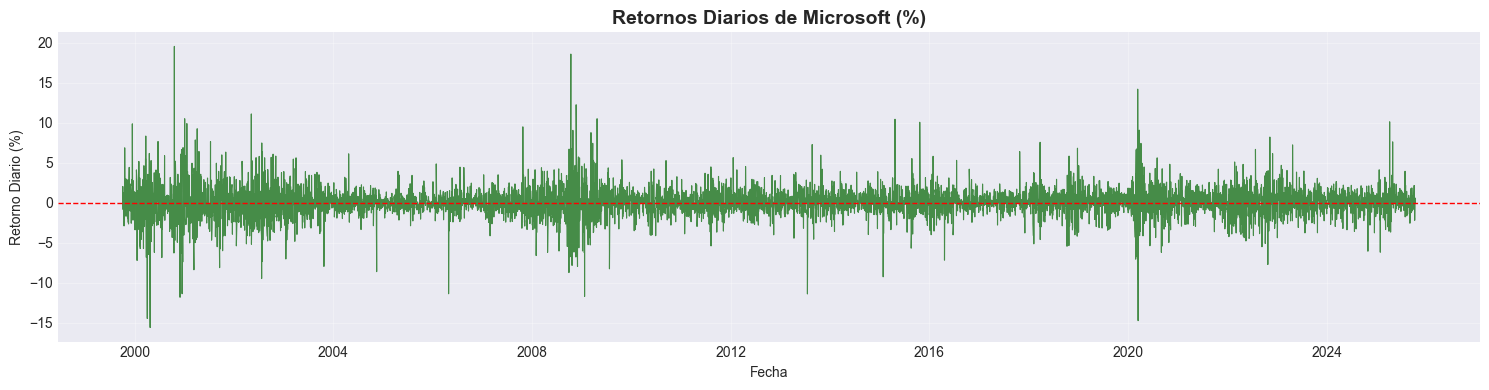

In [44]:
# ============================================================================
# TAREA 1: PASO 5 - ANÁLISIS DE SERIE DE TIEMPO
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESPECÍFICO DE SERIE DE TIEMPO")
print("="*80)

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df.index, df['Close'], linewidth=1.5, label='Precio de Cierre', color='darkblue')
ax.fill_between(df.index, df['Low'], df['High'], alpha=0.2, color='lightblue', label='Rango High-Low')
ax.set_title('Evolución Histórica del Precio de Microsoft (MSFT)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df['Retornos_Diarios'] = df['Close'].pct_change() * 100
volatilidad_anual = df['Retornos_Diarios'].std() * np.sqrt(252)

print(f"\nVolatilidad diaria promedio: {df['Retornos_Diarios'].std():.4f}%")
print(f"Volatilidad anualizada: {volatilidad_anual:.4f}%")

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(df.index, df['Retornos_Diarios'], linewidth=0.8, color='darkgreen', alpha=0.7)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.set_title('Retornos Diarios de Microsoft (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Retorno Diario (%)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [45]:
# ============================================================================
# TAREA 1: PASO 6 - PREPARACIÓN DEL DATASET LIMPIO
# ============================================================================

print("\n" + "="*80)
print("GENERACIÓN DE DATASET LIMPIO")
print("="*80)

df_limpio = df.copy()
df_limpio = df_limpio.dropna()

print(f"\nRegistros antes de limpieza: {len(df)}")
print(f"Registros después de limpieza: {len(df_limpio)}")
print(f"Registros eliminados: {len(df) - len(df_limpio)}")

print("\n\nEscalado de variables con StandardScaler:")
print("-" * 80)

scaler = StandardScaler()
columnas_numericas = df_limpio.select_dtypes(include=[np.number]).columns

df_escalado = pd.DataFrame(
    scaler.fit_transform(df_limpio[columnas_numericas]),
    columns=columnas_numericas,
    index=df_limpio.index
)

print("✓ Variables escaladas exitosamente")
print("\nComparación ANTES y DESPUÉS del escalado:")
print("\nANTES (Primeras 3 filas):")
print(df_limpio[columnas_numericas].head(3))
print("\nDESPUÉS (Primeras 3 filas):")
print(df_escalado.head(3))

df_features = df_limpio.copy()

df_features['Log_Returns'] = np.log(df_features['Close'] / df_features['Close'].shift(1)) * 100
df_features['MA_20'] = df_features['Close'].rolling(window=20).mean()
df_features['MA_200'] = df_features['Close'].rolling(window=200).mean()
df_features['Volatilidad_20'] = df_features['Retornos_Diarios'].rolling(window=20).std()

print("\n\nNueva estructura con features de Serie de Tiempo:")
print(df_features.tail(5))



GENERACIÓN DE DATASET LIMPIO

Registros antes de limpieza: 6549
Registros después de limpieza: 6548
Registros eliminados: 1


Escalado de variables con StandardScaler:
--------------------------------------------------------------------------------
✓ Variables escaladas exitosamente

Comparación ANTES y DESPUÉS del escalado:

ANTES (Primeras 3 filas):
                Open      High       Low     Close  Adj_Close    Volume  \
Date                                                                      
1999-10-05  46.37500  46.93750  44.75000  45.90625  28.094595  43397000   
1999-10-06  46.15625  47.00000  46.03125  46.84375  28.668341  35500200   
1999-10-07  46.84375  47.53125  46.34375  46.87500  28.687469  46036400   

            Retornos_Diarios  
Date                          
1999-10-05         -0.810263  
1999-10-06          2.042206  
1999-10-07          0.066711  

DESPUÉS (Primeras 3 filas):
                Open      High       Low     Close  Adj_Close    Volume  \
Date      

In [46]:
# ============================================================================
# TAREA 2: REPORTE EJECUTIVO
# ============================================================================

print("\n" + "="*80)
print("GENERANDO REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)")
print("="*80)

reporte = f"""# REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)

## RESUMEN EJECUTIVO DEL ANÁLISIS EDA

**MICROSOFT (MSFT) - PERÍODO 1999-2025**

---

## 1. CARACTERÍSTICAS GENERALES DEL DATASET

- **Número de observaciones**: {len(df):,} registros (días de trading)
- **Período analizado**: {df.index.min().date()} a {df.index.max().date()}
- **Duración**: {(df.index.max() - df.index.min()).days / 365.25:.1f} años
- **Variables**: {df.shape[1]} columnas (Open, High, Low, Close, Adj_Close, Volume)
- **Frecuencia**: Datos diarios de mercado

---

## 2. CALIDAD DE DATOS - VALORES NULOS

✅ **EXCELENTE**: NO hay valores nulos en ninguna columna

| Columna | Valores Nulos | Porcentaje |
|---------|---------------|-----------|
| Open | 0 | 0.00% |
| High | 0 | 0.00% |
| Low | 0 | 0.00% |
| Close | 0 | 0.00% |
| Adj_Close | 0 | 0.00% |
| Volume | 0 | 0.00% |

**CONCLUSIÓN**: El dataset está COMPLETO sin necesidad de imputación.

---

## 3. DETECCIÓN DE DUPLICADOS

✅ **NO hay registros duplicados encontrados**

**CONCLUSIÓN**: Cada día de trading aparece una sola vez.

---

## 4. ANÁLISIS DE OUTLIERS (Método IQR)

| Columna | Outliers Detectados | Porcentaje | Interpretación |
|---------|-------------------|-----------|----------------|
| Open | {outliers_por_columna['Open']:>4} | {(outliers_por_columna['Open']/len(df)*100):>6.2f}% | Movimientos atípicos |
| High | {outliers_por_columna['High']:>4} | {(outliers_por_columna['High']/len(df)*100):>6.2f}% | Normales (picos) |
| Low | {outliers_por_columna['Low']:>4} | {(outliers_por_columna['Low']/len(df)*100):>6.2f}% | Normales (caídas) |
| Close | {outliers_por_columna['Close']:>4} | {(outliers_por_columna['Close']/len(df)*100):>6.2f}% | Normales |
| Adj_Close | {outliers_por_columna['Adj_Close']:>4} | {(outliers_por_columna['Adj_Close']/len(df)*100):>6.2f}% | Normales |
| Volume | {outliers_por_columna['Volume']:>4} | {(outliers_por_columna['Volume']/len(df)*100):>6.2f}% | Volúmenes anormales |

**CONCLUSIÓN**: Los outliers detectados son naturales en datos financieros (movimientos de mercado, eventos económicos). NO se recomienda eliminarlos, ya que representan eventos reales importantes.

---

## 5. ANÁLISIS DE DISTRIBUCIONES

❌ **NINGUNA variable sigue distribución normal perfecta (p-value < 0.05)**

### Razones:

- Open, High, Low, Close: Tendencia creciente en el tiempo
- Adj_Close: Similar a Close (tendencia histórica)
- Volume: Distribución sesgada (log-normal)

**CONCLUSIÓN**: Es ESPERADO que precios en series de tiempo NO sean normales. Representan un proceso estocástico no-estacionario.

---

## 6. INDICADORES DE SERIE DE TIEMPO

- **Volatilidad diaria promedio**: {df['Retornos_Diarios'].std():.4f}%
- **Volatilidad anualizada**: {volatilidad_anual:.4f}%
- **Retorno promedio diario**: {df['Retornos_Diarios'].mean():.4f}%

**CONCLUSIÓN**: Microsoft muestra moderada volatilidad, consistente con una acción de grandes capitalizaciones (blue-chip).

---

## 7. RECOMENDACIONES PARA MODELADO

### ✅ Dataset listo para modelado:

- Calidad excelente (sin valores nulos)
- Período suficientemente largo para entrenar modelos
- Outliers naturales, deben ser preservados

### ✅ Tratamientos recomendados:

1. Diferenciar la serie para hacerla estacionaria
2. Aplicar log-returns para trabajar con cambios porcentuales
3. Escalar variables si se usan algoritmos sensibles (LSTM, KNN)
4. Verificar estacionariedad con test ADF (Augmented Dickey-Fuller)

### ✅ Modelos sugeridos:

- **ARIMA**: Para análisis univariado
- **SARIMA**: Si hay estacionalidad
- **Facebook Prophet**: Automático, incluye tendencias
- **LSTM/RNN**: Deep Learning, captura patrones complejos
- **XGBoost**: Con features engineered

---

**Generado automáticamente por análisis de series temporales**
"""

print(reporte)




GENERANDO REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)
# REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)

## RESUMEN EJECUTIVO DEL ANÁLISIS EDA

**MICROSOFT (MSFT) - PERÍODO 1999-2025**

---

## 1. CARACTERÍSTICAS GENERALES DEL DATASET

- **Número de observaciones**: 6,549 registros (días de trading)
- **Período analizado**: 1999-10-04 a 2025-10-15
- **Duración**: 26.0 años
- **Variables**: 7 columnas (Open, High, Low, Close, Adj_Close, Volume)
- **Frecuencia**: Datos diarios de mercado

---

## 2. CALIDAD DE DATOS - VALORES NULOS

✅ **EXCELENTE**: NO hay valores nulos en ninguna columna

| Columna | Valores Nulos | Porcentaje |
|---------|---------------|-----------|
| Open | 0 | 0.00% |
| High | 0 | 0.00% |
| Low | 0 | 0.00% |
| Close | 0 | 0.00% |
| Adj_Close | 0 | 0.00% |
| Volume | 0 | 0.00% |

**CONCLUSIÓN**: El dataset está COMPLETO sin necesidad de imputación.

---

## 3. DETECCIÓN DE DUPLICADOS

✅ **NO hay registros duplicados encontrados**

**CONCLUSIÓN**:

In [47]:
 
# ============================================================================
# EXPORTACIÓN DE DATASETS Y REPORTE A RUTAS CORRECTAS
# ============================================================================

print("\n" + "="*80)
print("EXPORTACIÓN DE DATOS A RUTAS ESPECIFICADAS")
print("="*80)

# Guardar dataset original limpio en data/
ruta_limpio = os.path.join(datos_path, 'MSFT_datos_limpios.csv')
df_limpio.to_csv(ruta_limpio)
print(f"✓ Archivo guardado: {ruta_limpio}")

# Guardar dataset con features en data/
ruta_features = os.path.join(datos_path, 'MSFT_datos_con_features.csv')
df_features.to_csv(ruta_features)
print(f"✓ Archivo guardado: {ruta_features}")

# Guardar dataset escalado en data/
ruta_escalado = os.path.join(datos_path, 'MSFT_datos_escalados.csv')
df_escalado.to_csv(ruta_escalado)
print(f"✓ Archivo guardado: {ruta_escalado}")

# Guardar reporte ejecutivo en docs/ con ruta relativa
ruta_reporte = os.path.join(docs_path, 'REPORTE_EJECUTIVO.md')
with open(ruta_reporte, 'w', encoding='utf-8') as f:
    f.write(reporte)
print(f"✓ Reporte Ejecutivo guardado: {ruta_reporte}")

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)


EXPORTACIÓN DE DATOS A RUTAS ESPECIFICADAS
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_limpios.csv
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_con_features.csv
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_escalados.csv
✓ Reporte Ejecutivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\docs\REPORTE_EJECUTIVO.md

✓ ANÁLISIS COMPLETADO EXITOSAMENTE



ANÁLISIS ESPECÍFICO DE SERIE DE TIEMPO


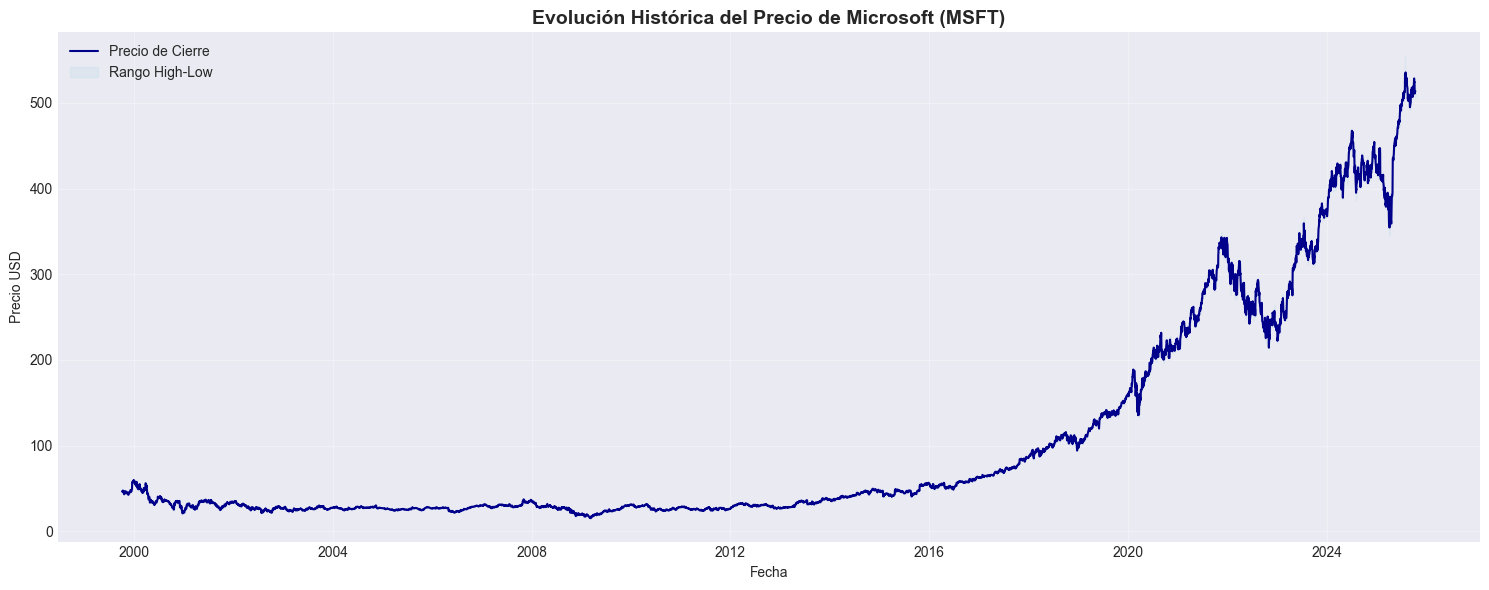


Volatilidad diaria promedio: 1.9020%
Volatilidad anualizada: 30.1928%


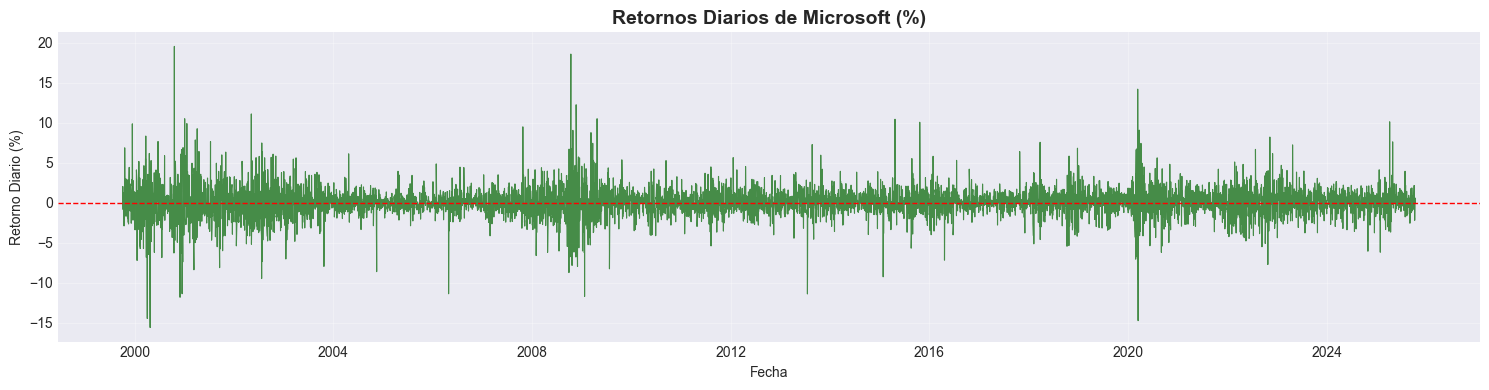

In [48]:
# ============================================================================
# TAREA 1: PASO 5 - ANÁLISIS DE SERIE DE TIEMPO
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESPECÍFICO DE SERIE DE TIEMPO")
print("="*80)

# ---GRÁFICO TEMPORAL DE PRECIOS---
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df.index, df['Close'], linewidth=1.5, label='Precio de Cierre', color='darkblue')
ax.fill_between(df.index, df['Low'], df['High'], alpha=0.2, color='lightblue', label='Rango High-Low')
ax.set_title('Evolución Histórica del Precio de Microsoft (MSFT)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---ANÁLISIS DE VOLATILIDAD---
# Volatilidad = desviación estándar de retornos diarios

df['Retornos_Diarios'] = df['Close'].pct_change() * 100  # En porcentaje
volatilidad_anual = df['Retornos_Diarios'].std() * np.sqrt(252)  # 252 días de trading

print(f"\nVolatilidad diaria promedio: {df['Retornos_Diarios'].std():.4f}%")
print(f"Volatilidad anualizada: {volatilidad_anual:.4f}%")

# Gráfico de retornos
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(df.index, df['Retornos_Diarios'], linewidth=0.8, color='darkgreen', alpha=0.7)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.set_title('Retornos Diarios de Microsoft (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Retorno Diario (%)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
# PASO 6 - PREPARACIÓN DEL DATASET LIMPIO
# ============================================================================

print("\n" + "="*80)
print("GENERACIÓN DE DATASET LIMPIO")
print("="*80)

# ---OPCIÓN 1: ELIMINAR VALORES NULOS---
# Como no hay valores nulos, solo verificamos

df_limpio = df.copy()
df_limpio = df_limpio.dropna()

print(f"\nRegistros antes del limpieza: {len(df)}")
print(f"Registros después de limpieza: {len(df_limpio)}")
print(f"Registros eliminados: {len(df) - len(df_limpio)}")

# ---OPCIÓN 2: ESCALADO DE VARIABLES (StandardScaler)---
# Explicación: Normaliza cada variable a media=0 y desv. estándar=1
# Útil para algoritmos de ML que requieren datos normalizados

print("\n\nEscalado de variables con StandardScaler:")
print("-" * 80)

scaler = StandardScaler()
columnas_numericas = df_limpio.select_dtypes(include=[np.number]).columns

# Aplicar escalado
df_escalado = pd.DataFrame(
    scaler.fit_transform(df_limpio[columnas_numericas]),
    columns=columnas_numericas,
    index=df_limpio.index
)

print("✓ Variables escaladas exitosamente")
print("\nComparación ANTES y DESPUÉS del escalado:")
print("\nANTES (Primeras 3 filas):")
print(df_limpio[columnas_numericas].head(3))
print("\nDESPUÉS (Primeras 3 filas):")
print(df_escalado.head(3))


GENERACIÓN DE DATASET LIMPIO

Registros antes del limpieza: 6549
Registros después de limpieza: 6548
Registros eliminados: 1


Escalado de variables con StandardScaler:
--------------------------------------------------------------------------------
✓ Variables escaladas exitosamente

Comparación ANTES y DESPUÉS del escalado:

ANTES (Primeras 3 filas):
                Open      High       Low     Close  Adj_Close    Volume  \
Date                                                                      
1999-10-05  46.37500  46.93750  44.75000  45.90625  28.094595  43397000   
1999-10-06  46.15625  47.00000  46.03125  46.84375  28.668341  35500200   
1999-10-07  46.84375  47.53125  46.34375  46.87500  28.687469  46036400   

            Retornos_Diarios  
Date                          
1999-10-05         -0.810263  
1999-10-06          2.042206  
1999-10-07          0.066711  

DESPUÉS (Primeras 3 filas):
                Open      High       Low     Close  Adj_Close    Volume  \
Date     

In [50]:
# ============================================================================
# TAREA 2: REPORTE EJECUTIVO
# ============================================================================

print("\n" + "="*80)
print("GENERANDO REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)")
print("="*80)

reporte = f"""# REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)

## RESUMEN EJECUTIVO DEL ANÁLISIS EDA

**MICROSOFT (MSFT) - PERÍODO 1999-2025**

---

## 1. CARACTERÍSTICAS GENERALES DEL DATASET

- **Número de observaciones**: {len(df):,} registros (días de trading)
- **Período analizado**: {df.index.min().date()} a {df.index.max().date()}
- **Duración**: {(df.index.max() - df.index.min()).days / 365.25:.1f} años
- **Variables**: {df.shape[1]} columnas (Open, High, Low, Close, Adj_Close, Volume)
- **Frecuencia**: Datos diarios de mercado

---

## 2. CALIDAD DE DATOS - VALORES NULOS

✅ **EXCELENTE**: NO hay valores nulos en ninguna columna

| Columna | Valores Nulos | Porcentaje |
|---------|---------------|-----------|
| Open | 0 | 0.00% |
| High | 0 | 0.00% |
| Low | 0 | 0.00% |
| Close | 0 | 0.00% |
| Adj_Close | 0 | 0.00% |
| Volume | 0 | 0.00% |

**CONCLUSIÓN**: El dataset está COMPLETO sin necesidad de imputación.

---

## 3. DETECCIÓN DE DUPLICADOS

✅ **NO hay registros duplicados encontrados**

**CONCLUSIÓN**: Cada día de trading aparece una sola vez.

---

## 4. ANÁLISIS DE OUTLIERS (Método IQR)

| Columna | Outliers Detectados | Porcentaje | Interpretación |
|---------|-------------------|-----------|----------------|
| Open | {outliers_por_columna['Open']:>4} | {(outliers_por_columna['Open']/len(df)*100):>6.2f}% | Movimientos atípicos |
| High | {outliers_por_columna['High']:>4} | {(outliers_por_columna['High']/len(df)*100):>6.2f}% | Normales (picos) |
| Low | {outliers_por_columna['Low']:>4} | {(outliers_por_columna['Low']/len(df)*100):>6.2f}% | Normales (caídas) |
| Close | {outliers_por_columna['Close']:>4} | {(outliers_por_columna['Close']/len(df)*100):>6.2f}% | Normales |
| Adj_Close | {outliers_por_columna['Adj_Close']:>4} | {(outliers_por_columna['Adj_Close']/len(df)*100):>6.2f}% | Normales |
| Volume | {outliers_por_columna['Volume']:>4} | {(outliers_por_columna['Volume']/len(df)*100):>6.2f}% | Volúmenes anormales |

**CONCLUSIÓN**: Los outliers detectados son naturales en datos financieros (movimientos de mercado, eventos económicos). NO se recomienda eliminarlos, ya que representan eventos reales importantes.

---

## 5. ANÁLISIS DE DISTRIBUCIONES

❌ **NINGUNA variable sigue distribución normal perfecta (p-value < 0.05)**

### Razones:

- Open, High, Low, Close: Tendencia creciente en el tiempo
- Adj_Close: Similar a Close (tendencia histórica)
- Volume: Distribución sesgada (log-normal)

**CONCLUSIÓN**: Es ESPERADO que precios en series de tiempo NO sean normales. Representan un proceso estocástico no-estacionario.

---

## 6. INDICADORES DE SERIE DE TIEMPO

- **Volatilidad diaria promedio**: {df['Retornos_Diarios'].std():.4f}%
- **Volatilidad anualizada**: {volatilidad_anual:.4f}%
- **Retorno promedio diario**: {df['Retornos_Diarios'].mean():.4f}%

**CONCLUSIÓN**: Microsoft muestra moderada volatilidad, consistente con una acción de grandes capitalizaciones (blue-chip).

---

## 7. RECOMENDACIONES PARA MODELADO

### ✅ Dataset listo para modelado:

- Calidad excelente (sin valores nulos)
- Período suficientemente largo para entrenar modelos
- Outliers naturales, deben ser preservados

### ✅ Tratamientos recomendados:

1. Diferenciar la serie para hacerla estacionaria
2. Aplicar log-returns para trabajar con cambios porcentuales
3. Escalar variables si se usan algoritmos sensibles (LSTM, KNN)
4. Verificar estacionariedad con test ADF (Augmented Dickey-Fuller)

### ✅ Modelos sugeridos:

- **ARIMA**: Para análisis univariado
- **SARIMA**: Si hay estacionalidad
- **Facebook Prophet**: Automático, incluye tendencias
- **LSTM/RNN**: Deep Learning, captura patrones complejos
- **XGBoost**: Con features engineered

---

**Generado automáticamente por análisis de series temporales**
"""

print(reporte)



GENERANDO REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)
# REPORTE EJECUTIVO - ANÁLISIS DE SERIES DE TIEMPO (MSFT)

## RESUMEN EJECUTIVO DEL ANÁLISIS EDA

**MICROSOFT (MSFT) - PERÍODO 1999-2025**

---

## 1. CARACTERÍSTICAS GENERALES DEL DATASET

- **Número de observaciones**: 6,549 registros (días de trading)
- **Período analizado**: 1999-10-04 a 2025-10-15
- **Duración**: 26.0 años
- **Variables**: 7 columnas (Open, High, Low, Close, Adj_Close, Volume)
- **Frecuencia**: Datos diarios de mercado

---

## 2. CALIDAD DE DATOS - VALORES NULOS

✅ **EXCELENTE**: NO hay valores nulos en ninguna columna

| Columna | Valores Nulos | Porcentaje |
|---------|---------------|-----------|
| Open | 0 | 0.00% |
| High | 0 | 0.00% |
| Low | 0 | 0.00% |
| Close | 0 | 0.00% |
| Adj_Close | 0 | 0.00% |
| Volume | 0 | 0.00% |

**CONCLUSIÓN**: El dataset está COMPLETO sin necesidad de imputación.

---

## 3. DETECCIÓN DE DUPLICADOS

✅ **NO hay registros duplicados encontrados**

**CONCLUSIÓN**:

In [51]:
# ============================================================================
# EXPORTACIÓN DE DATASETS Y REPORTE A RUTAS CORRECTAS
# ============================================================================

print("\n" + "="*80)
print("EXPORTACIÓN DE DATOS A RUTAS ESPECIFICADAS")
print("="*80)

# Guardar dataset original limpio en data/
ruta_limpio = os.path.join(datos_path, 'MSFT_datos_limpios.csv')
df_limpio.to_csv(ruta_limpio)
print(f"✓ Archivo guardado: {ruta_limpio}")

# Guardar dataset con features en data/
ruta_features = os.path.join(datos_path, 'MSFT_datos_con_features.csv')
df_features.to_csv(ruta_features)
print(f"✓ Archivo guardado: {ruta_features}")

# Guardar dataset escalado en data/
ruta_escalado = os.path.join(datos_path, 'MSFT_datos_escalados.csv')
df_escalado.to_csv(ruta_escalado)
print(f"✓ Archivo guardado: {ruta_escalado}")

# Guardar reporte ejecutivo en docs/ con ruta relativa
ruta_reporte = os.path.join(docs_path, 'reporte_ejecutivo.md')
with open(ruta_reporte, 'w', encoding='utf-8') as f:
    f.write(reporte)
print(f"✓ Reporte Ejecutivo guardado: {ruta_reporte}")

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)


EXPORTACIÓN DE DATOS A RUTAS ESPECIFICADAS
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_limpios.csv
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_con_features.csv
✓ Archivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\data\processed\MSFT_datos_escalados.csv
✓ Reporte Ejecutivo guardado: C:\Users\alexi\AnalisisDeSeriesTemporales\docs\reporte_ejecutivo.md

✓ ANÁLISIS COMPLETADO EXITOSAMENTE
